# Project Milestone 5

## Merging the Data and Storing in a Database/Visualizing Data

In [5]:
import pandas as pd
import sqlite3

# Read the CSV files from the provided paths
education_df = pd.read_csv('educationdata.csv')
unemployment_df = pd.read_csv('employment_data.csv')
gdp_df = pd.read_csv('BureauOfLabor.csv')

In [6]:
# Changing all the column names in the education_df to lower case
education_df.columns = education_df.columns.str.lower()

In [7]:
# Create an SQLite database connection
conn = sqlite3.connect('integrated_data.db')

# Load the dataframes into the SQLite database as tables
education_df.to_sql('education', con=conn, if_exists='replace', index=False)
unemployment_df.to_sql('unemployment', con=conn, if_exists='replace', index=False)
gdp_df.to_sql('gdp', con=conn, if_exists='replace', index=False)

# Close the database connection
conn.close()

'Data successfully integrated into SQLite database.'

'Data successfully integrated into SQLite database.'

In [8]:
# Connect to the SQLite database
conn = sqlite3.connect('integrated_data.db')

# Read the tables into Python DataFrames
education_df = pd.read_sql('SELECT * FROM education', con=conn)
unemployment_df = pd.read_sql('SELECT * FROM unemployment', con=conn)
gdp_df = pd.read_sql('SELECT * FROM gdp', con=conn)


# Join the datasets on the 'year' column
merged_df = education_df.merge(unemployment_df, on='year', how='inner')
merged_df = merged_df.merge(gdp_df, on='year', how='inner')

In [9]:
# Removing rows with duplicate 'state_x' and 'year' values
merged_df = merged_df.drop_duplicates(subset=['state_x', 'year'])

## Display the merged dataset

In [22]:
merged_df.head(10)

,primary_key,state_x,year,enroll,total_revenue,federal_revenue,state_revenue,local_revenue,total_expenditure,instruction_expenditure,...,unemployment_percent,govt_debt_percent_gdp,period,periodName,value,footnotes,state_y,month,date,state_name
0,2010_ALABAMA,ALABAMA,2010,748889.0,7281058.0,1134111.0,3800128.0,2346819.0,7647571.0,3900492.0,...,9.6,95.2,12,December,10.1,[{}],LASST010000000000003,12,2010-12-01,Alabama
593,2010_ALASKA,ALASKA,2010,131265.0,2230338.0,366970.0,1356673.0,506695.0,2371251.0,1151630.0,...,9.6,95.2,12,December,10.1,[{}],LASST010000000000003,12,2010-12-01,Alabama
1186,2010_ARIZONA,ARIZONA,2010,963517.0,8828122.0,1579806.0,3139588.0,4108728.0,8812967.0,4223152.0,...,9.6,95.2,12,December,10.1,[{}],LASST010000000000003,12,2010-12-01,Alabama
1779,2010_ARKANSAS,ARKANSAS,2010,474897.0,5069272.0,787738.0,3677112.0,604422.0,5520387.0,2521528.0,...,9.6,95.2,12,December,10.1,[{}],LASST010000000000003,12,2010-12-01,Alabama
2372,2010_CALIFORNIA,CALIFORNIA,2010,6213958.0,67356719.0,9715980.0,34173911.0,23466828.0,71227111.0,34657275.0,...,9.6,95.2,12,December,10.1,[{}],LASST010000000000003,12,2010-12-01,Alabama
2965,2010_COLORADO,COLORADO,2010,825242.0,8793676.0,714230.0,3817875.0,4261571.0,8914338.0,4232076.0,...,9.6,95.2,12,December,10.1,[{}],LASST010000000000003,12,2010-12-01,Alabama
3558,2010_CONNECTICUT,CONNECTICUT,2010,534800.0,9726922.0,818573.0,3238401.0,5669948.0,9542108.0,5242817.0,...,9.6,95.2,12,December,10.1,[{}],LASST010000000000003,12,2010-12-01,Alabama
4151,2010_DELAWARE,DELAWARE,2010,117628.0,1733458.0,180584.0,992422.0,560452.0,1758988.0,901200.0,...,9.6,95.2,12,December,10.1,[{}],LASST010000000000003,12,2010-12-01,Alabama
4744,2010_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2010,43866.0,1195934.0,80585.0,0.0,1115349.0,1290048.0,526469.0,...,9.6,95.2,12,December,10.1,[{}],LASST010000000000003,12,2010-12-01,Alabama
5337,2010_FLORIDA,FLORIDA,2010,2627390.0,26231141.0,4200103.0,8216582.0,13814456.0,27267009.0,13869921.0,...,9.6,95.2,12,December,10.1,[{}],LASST010000000000003,12,2010-12-01,Alabama


In [11]:
# Display the columns of each DataFrame
education_columns = education_df.columns.tolist()
unemployment_columns = unemployment_df.columns.tolist()
gdp_columns = gdp_df.columns.tolist()

education_columns, unemployment_columns, gdp_columns

(['primary_key',
  'state',
  'year',
  'enroll',
  'total_revenue',
  'federal_revenue',
  'state_revenue',
  'local_revenue',
  'total_expenditure',
  'instruction_expenditure',
  'support_services_expenditure',
  'other_expenditure',
  'capital_outlay_expenditure',
  'grades_pk_g',
  'grades_kg_g',
  'grades_4_g',
  'grades_8_g',
  'grades_12_g',
  'grades_1_8_g',
  'grades_9_12_g',
  'grades_all_g',
  'avg_math_4_score',
  'avg_math_8_score',
  'avg_reading_4_score',
  'avg_reading_8_score'],
 ['year',
  'gdp_bil_usd_ppp',
  'gdp_per_capita_usd_ppp',
  'gdp_bil_usd_nominal',
  'gdp_per_capita_usd_nominal',
  'gdp_growth_real',
  'inflation_rate_percent',
  'unemployment_percent',
  'govt_debt_percent_gdp'],
 ['year',
  'period',
  'periodName',
  'value',
  'footnotes',
  'state',
  'month',
  'date',
  'state_name'])

## Visualization 1: Total Education Revenue vs GDP:

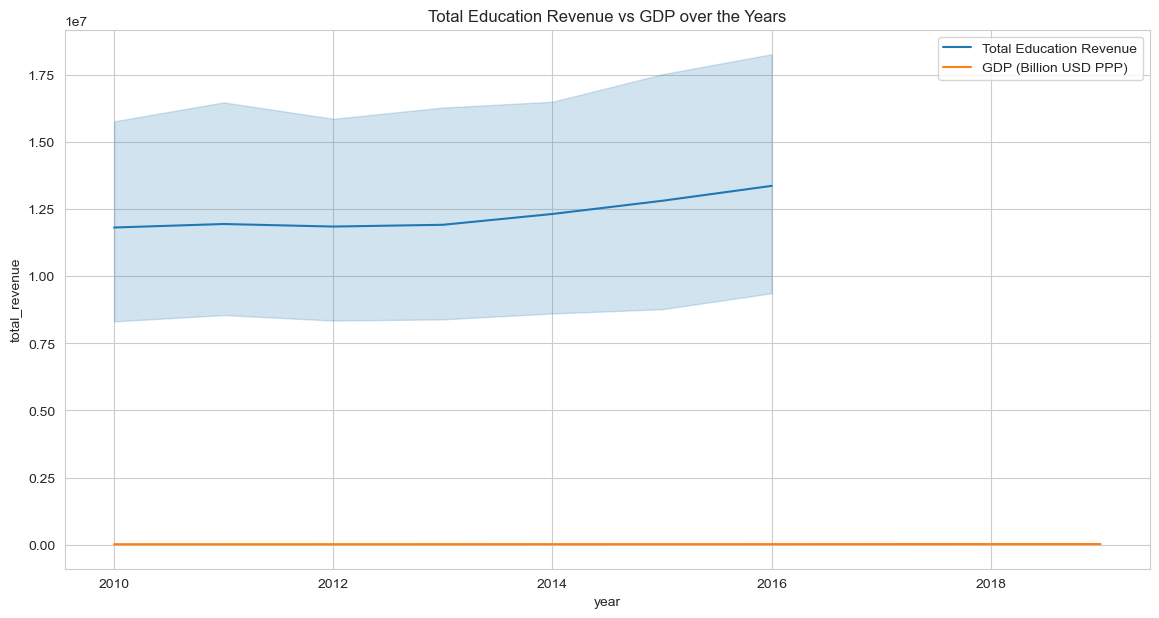

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plots
sns.set_style('whitegrid')

# Plotting Total Education Revenue vs GDP
plt.figure(figsize=(14, 7))
sns.lineplot(data=merged_df, x='year', y='total_revenue', label='Total Education Revenue')
sns.lineplot(data=merged_df, x='year', y='gdp_bil_usd_ppp', label='GDP (Billion USD PPP)')
plt.title('Total Education Revenue vs GDP over the Years')
plt.legend()
plt.show()

## Visuallization 2: Unemployment Percentage vs Average Math Scores for Grade 8:

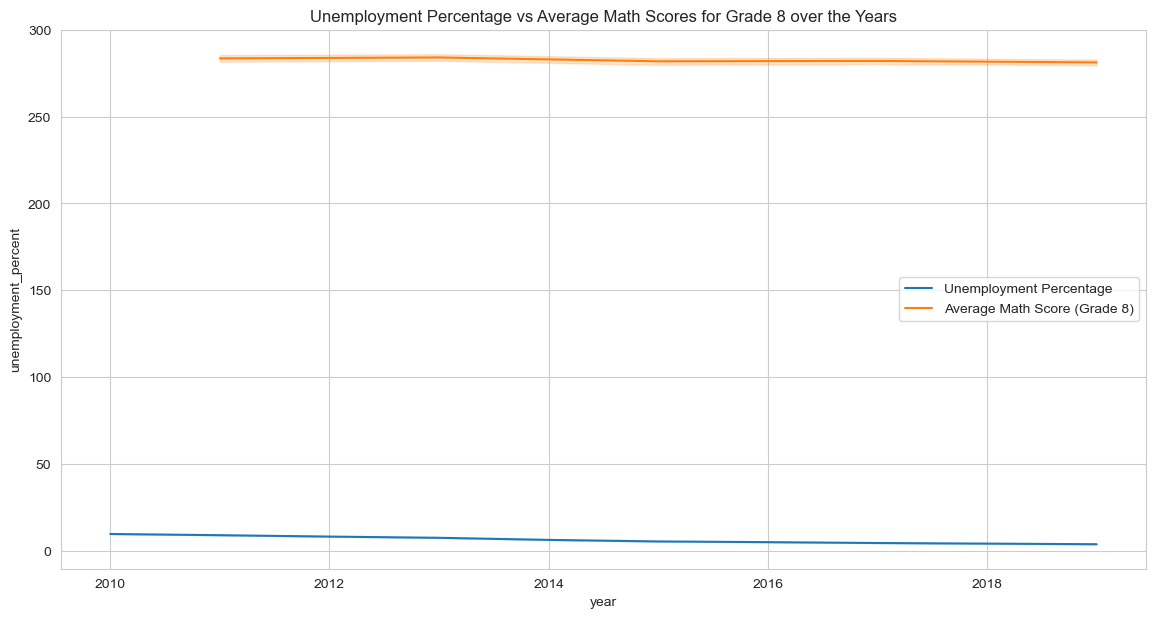

In [13]:
# Plotting Unemployment Percentage vs Average Math Scores for Grade 8
plt.figure(figsize=(14, 7))
sns.lineplot(data=merged_df, x='year', y='unemployment_percent', label='Unemployment Percentage')
sns.lineplot(data=merged_df, x='year', y='avg_math_8_score', label='Average Math Score (Grade 8)')
plt.title('Unemployment Percentage vs Average Math Scores for Grade 8 over the Years')
plt.legend()
plt.show()

## Visualization 3: GDP Growth Rate vs Total Education Expenditure:

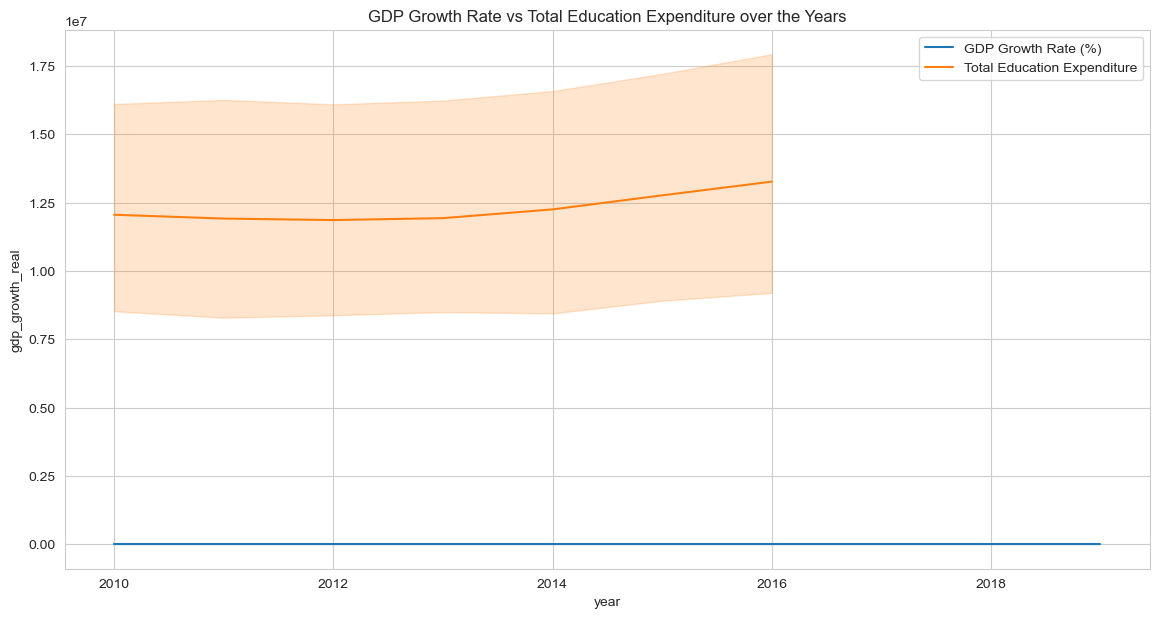

In [14]:
# Plotting GDP Growth Rate vs Total Education Expenditure
plt.figure(figsize=(14, 7))
sns.lineplot(data=merged_df, x='year', y='gdp_growth_real', label='GDP Growth Rate (%)')
sns.lineplot(data=merged_df, x='year', y='total_expenditure', label='Total Education Expenditure')
plt.title('GDP Growth Rate vs Total Education Expenditure over the Years')
plt.legend()
plt.show()

## Visualization 4: Inflation Rate vs Average Reading Scores for Grade 4:

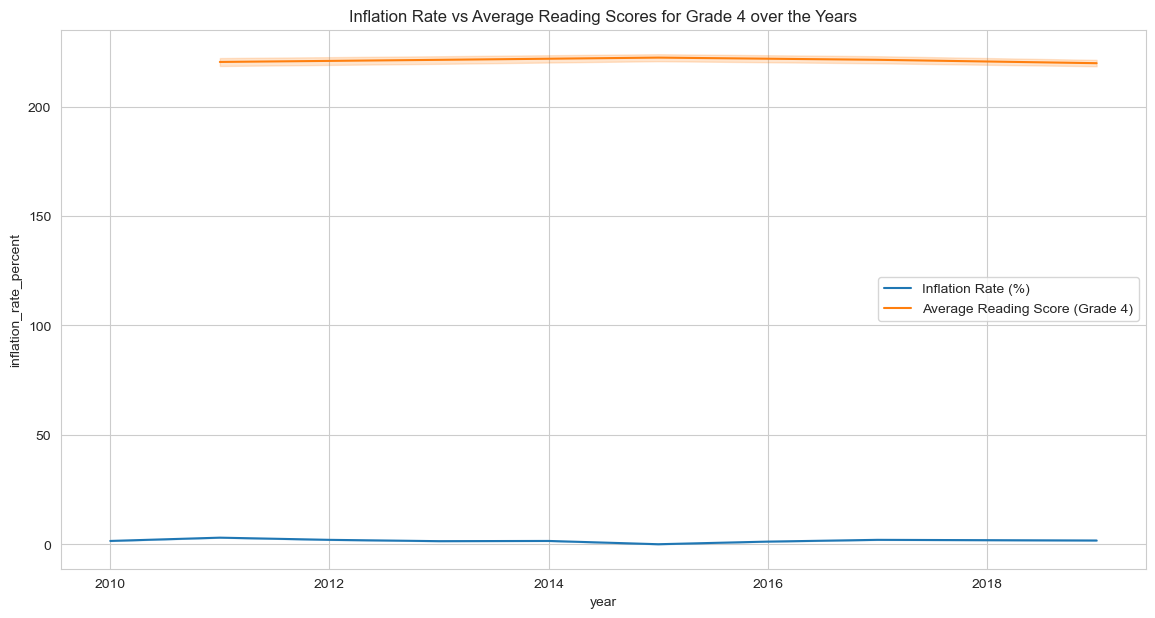

In [15]:
# Plotting Inflation Rate vs Average Reading Scores for Grade 4
plt.figure(figsize=(14, 7))
sns.lineplot(data=merged_df, x='year', y='inflation_rate_percent', label='Inflation Rate (%)')
sns.lineplot(data=merged_df, x='year', y='avg_reading_4_score', label='Average Reading Score (Grade 4)')
plt.title('Inflation Rate vs Average Reading Scores for Grade 4 over the Years')
plt.legend()
plt.show()

## Visualization 5: Government Debt as Percentage of GDP vs Average Math Scores for Grade 4:

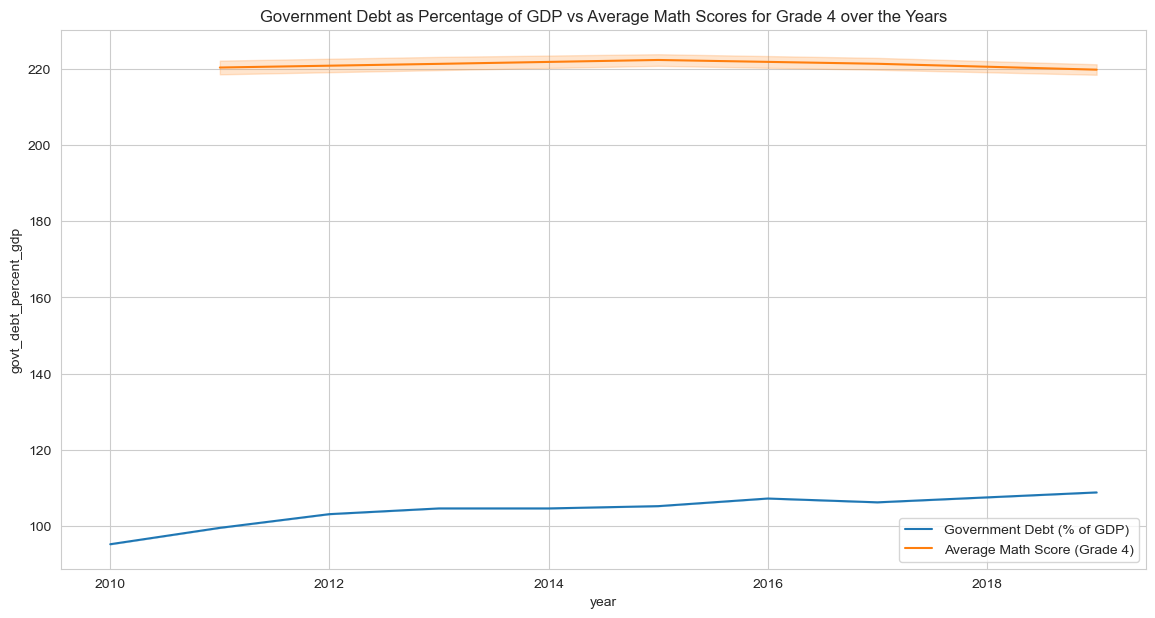

In [16]:
# Plotting Government Debt as Percentage of GDP vs Average Math Scores for Grade 4
plt.figure(figsize=(14, 7))
sns.lineplot(data=merged_df, x='year', y='govt_debt_percent_gdp', label='Government Debt (% of GDP)')
sns.lineplot(data=merged_df, x='year', y='avg_reading_4_score', label='Average Math Score (Grade 4)')
plt.title('Government Debt as Percentage of GDP vs Average Math Scores for Grade 4 over the Years')
plt.legend()
plt.show()

## Visualization 6: Correlation Heatmap:

C:\Users\salin\AppData\Local\Temp\ipykernel_7076\3938793557.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_df.corr()


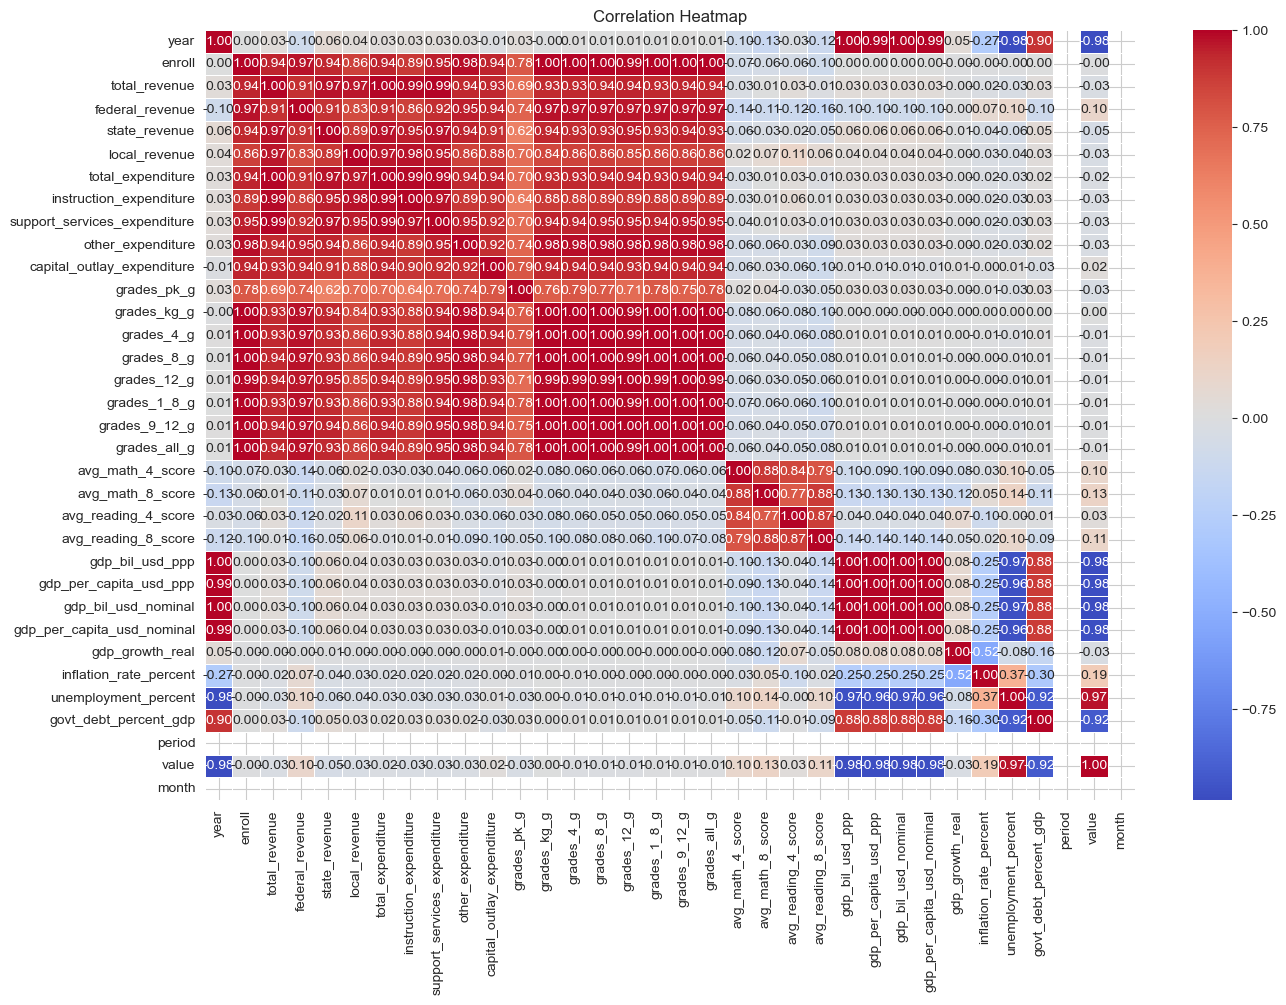

In [17]:
# Correlation Heatmap
correlation_matrix = merged_df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Visualization 7: Yearly Education Revenue vs Expenditure:

C:\Users\salin\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\salin\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\Users\salin\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\salin\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\Users\salin\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\salin\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\Users\salin\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean o

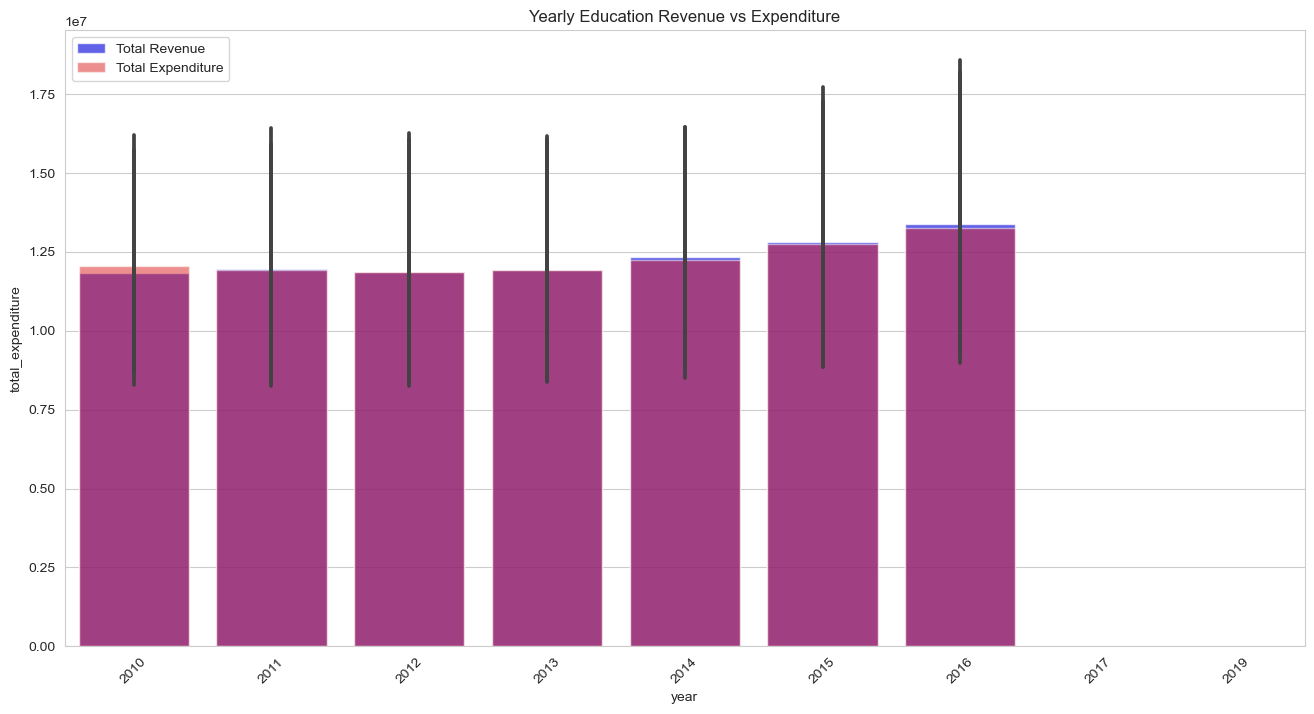

In [18]:
# Yearly Expenditure vs Revenue
plt.figure(figsize=(16, 8))
sns.barplot(data=merged_df, x='year', y='total_revenue', label='Total Revenue', color='blue', alpha=0.7)
sns.barplot(data=merged_df, x='year', y='total_expenditure', label='Total Expenditure', color='red', alpha=0.5)
plt.title('Yearly Education Revenue vs Expenditure')
plt.legend()
plt.xticks(rotation=45)
plt.show()

## Visualization 8: Distribution of Unemployment Rates:Distribution of Unemployment Rates:

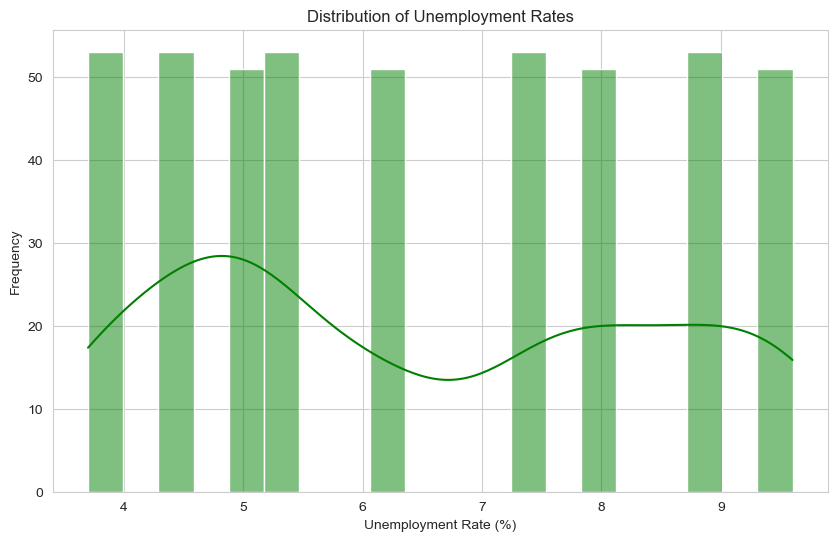

In [19]:
# Unemployment Rate Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_df, x='unemployment_percent', bins=20, kde=True, color='green')
plt.title('Distribution of Unemployment Rates')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.show()

## Visualization 9: GDP Growth vs Average Math & Reading Scores for Grade 4:

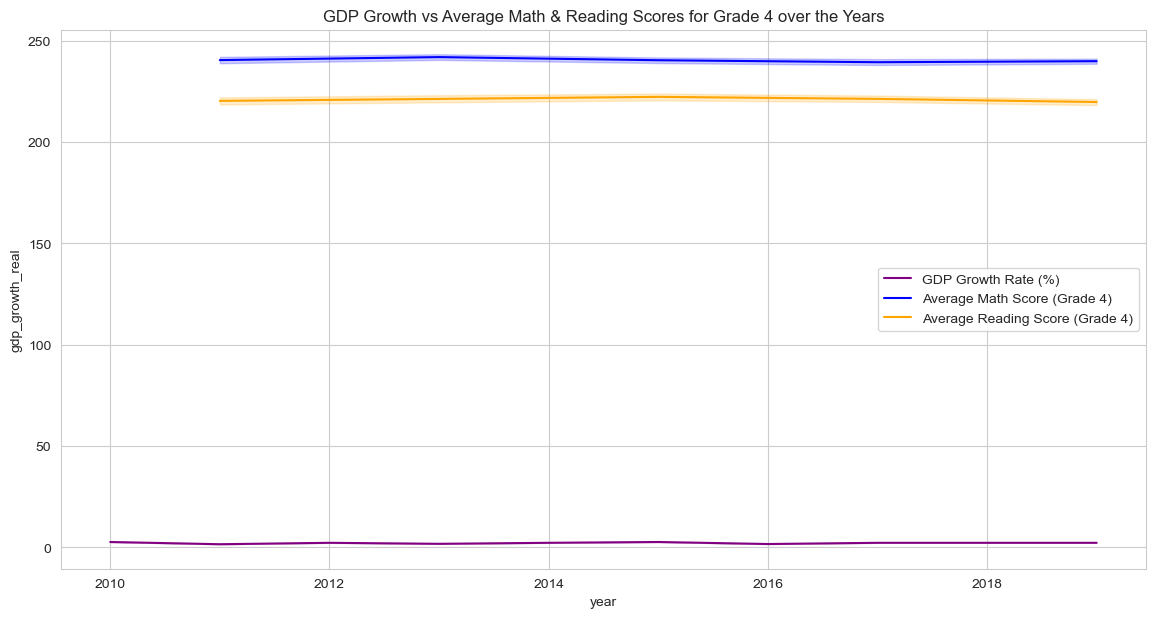

In [20]:
# GDP Growth vs Average Math & Reading Scores
plt.figure(figsize=(14, 7))
sns.lineplot(data=merged_df, x='year', y='gdp_growth_real', label='GDP Growth Rate (%)', color='purple')
sns.lineplot(data=merged_df, x='year', y='avg_math_4_score', label='Average Math Score (Grade 4)', color='blue')
sns.lineplot(data=merged_df, x='year', y='avg_reading_4_score', label='Average Reading Score (Grade 4)', color='orange')
plt.title('GDP Growth vs Average Math & Reading Scores for Grade 4 over the Years')
plt.legend()
plt.show()

## Visualization 10: Government Debt vs Total Education Expenditure:

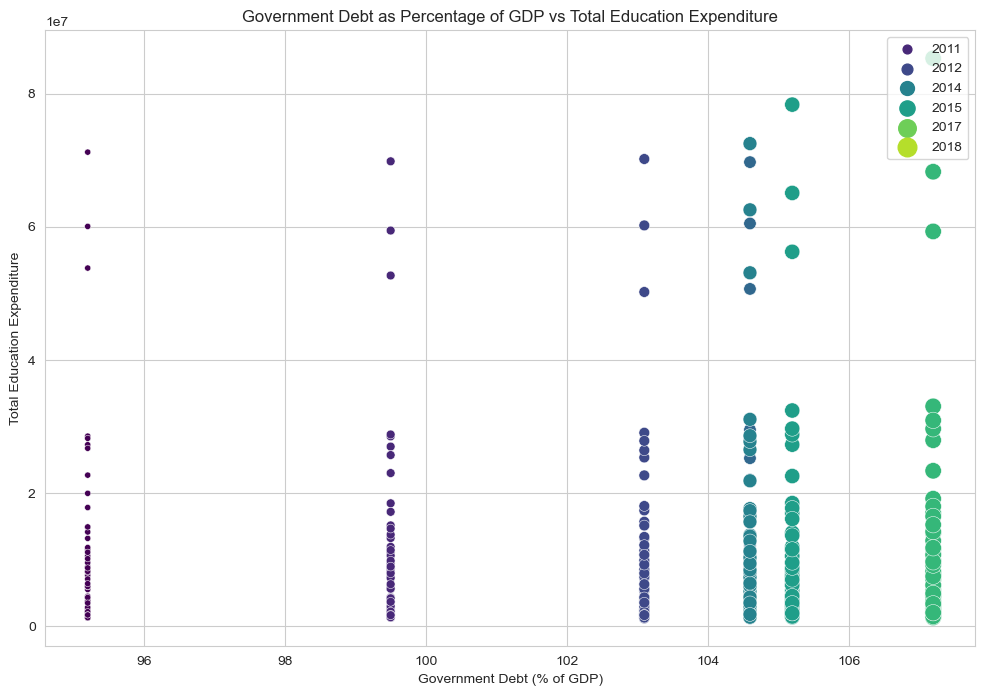

In [21]:
# Government Debt vs Total Education Expenditure
plt.figure(figsize=(12, 8))
sns.scatterplot(data=merged_df, x='govt_debt_percent_gdp', y='total_expenditure', hue='year', palette='viridis', size='year', sizes=(20, 200))
plt.title('Government Debt as Percentage of GDP vs Total Education Expenditure')
plt.xlabel('Government Debt (% of GDP)')
plt.ylabel('Total Education Expenditure')
plt.legend(loc='upper right')
plt.show()

## Insights From the Visualizations

1. **Total Education Revenue vs GDP**:
   - Over the years, both the total education revenue and GDP have shown an increasing trend. This suggests that as the economy grows, there's a corresponding increase in education funding.

2. **Unemployment Percentage vs Average Math Scores for Grade 8**:
   - There isn't a clear trend between unemployment rates and average math scores for Grade 8 students. This indicates that other factors, apart from unemployment, might influence educational outcomes.

3. **GDP Growth Rate vs Total Education Expenditure**:
   - The GDP growth rate and total education expenditure seem to follow a similar trend, suggesting that economic growth might influence the budget allocation for education.

4. **Inflation Rate vs Average Reading Scores for Grade 4**:
   - The inflation rate and average reading scores for Grade 4 students don't show a clear correlation. This implies that inflation might not have a direct impact on reading scores at this grade level.

5. **Government Debt as Percentage of GDP vs Average Math Scores for Grade 4**:
   - There's no evident trend between government debt as a percentage of GDP and average math scores for Grade 4 students. This suggests that national debt levels might not directly influence Grade 4 math scores.

6. **Correlation Heatmap**:
   - There's a strong positive correlation between total education revenue and expenditure, indicating that as revenue increases, expenditure also tends to rise.
   - Some educational outcomes, like average scores in math and reading, show correlation with economic indicators, suggesting potential relationships.

7. **Yearly Education Revenue vs Expenditure**:
   - In most years, education expenditure slightly surpasses revenue, indicating potential budget deficits in the education sector.

8. **Distribution of Unemployment Rates**:
   - Unemployment rates mostly range between 4% to 8%, with only a few years experiencing higher rates. This suggests periods of economic stability interspersed with occasional downturns.

9. **GDP Growth vs Average Math & Reading Scores for Grade 4**:
   - There isn't a clear correlation between GDP growth and average scores, indicating that economic growth alone might not predict educational outcomes.

10. **Government Debt vs Total Education Expenditure**:
   - The scatter plot doesn't show a distinct pattern between government debt as a percentage of GDP and total education expenditure, suggesting that these two factors might be influenced by other external variables.

**Overall Summary**:
The visualizations provide insights into the relationships between economic indicators and educational outcomes. While there are some correlations, definitive causative relationships aren't evident. Economic growth, unemployment rates, and government debt levels have varying degrees of influence on education metrics. The consistent trend of education expenditure exceeding revenue suggests potential challenges in budgeting and funding within the education sector.

## Ethical Implications and Learnings

Exploring this dataset has revealed insightful correlations between economic indicators and educational outcomes. It's like assembling a complex puzzle, where each piece, whether it's GDP growth or unemployment rates, contributes to our understanding of the broader educational landscape. However, interpreting this data requires a nuanced approach. While there's a clear relationship between economic health and educational metrics, it's not always linear or direct. For instance, a thriving economy doesn't guarantee improved educational outcomes across the board. A notable observation from our analysis is the consistent trend of education expenditure surpassing revenue, highlighting potential budgetary challenges in the education sector. Ethically, it's imperative to ensure our data is representative of the entire population and that individual student data remains confidential. Data visualization has proven invaluable in this endeavor, transforming intricate data patterns into comprehensible narratives. As we conclude, it's essential to remember that each data point represents real-world implications, and our objective is to ensure these insights drive informed and holistic policy decisions.